In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random


np.random.seed(18)
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis = 0)
K = 3 # 3 clusters
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

print(X.shape)

(1500, 2)


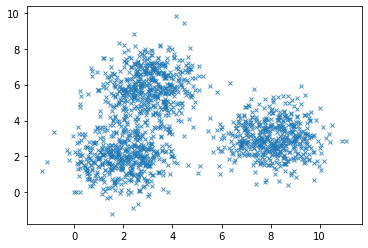

In [2]:
plt.plot(X[:,0],X[:,1],'x', markersize = 4, alpha = .8)

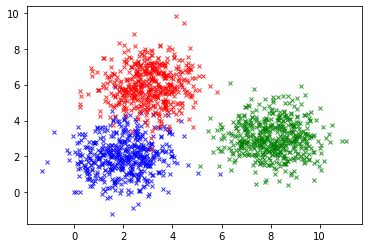

In [3]:
plt.plot(X0[:,0],X0[:,1],'bx', markersize = 4, alpha = .8)
plt.plot(X1[:,0],X1[:,1],'gx', markersize = 4, alpha = .8)
plt.plot(X2[:,0],X2[:,1],'rx', markersize = 4, alpha = .8)

In [4]:
# np.asarray: bien list thanh array

In [5]:
def kmeans_init_centroids(X, k):
    # randomly pick k rows of X as initial centroids
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [6]:
def kmeans_assign_labels(X, centroids):
    # calculate pairwise distances btw data and centroids
    D = cdist(X, centroids)
    # return index of the closest centroid
    return np.argmin(D, axis = 1)

def has_converged(centroids, new_centroids):
    # return True if two sets of centroids are the same
    return (set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids]))

def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points that are assigned to the k-th cluster
        Xk = X[labels == k, :]
        centroids[k,:] = np.mean(Xk, axis = 0) # take average
    return centroids

In [7]:
def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centroids[-1]))
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if has_converged(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
        it += 1
    return (centroids, labels, it)

In [8]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]#Ý nghĩa của dòng này là gì?
    X1 = X[label == 1, :]#Ý nghĩa của dòng này là gì?
    X2 = X[label == 2, :]#Ý nghĩa của dòng này là gì?
    
    plt.plot(X0[:, 0], X0[:, 1], 'bx', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'gx', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rx', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

Centers found by our algorithm:
 [[3.02702878 5.95686115]
 [8.07476866 3.01494931]
 [1.9834967  1.96588127]]


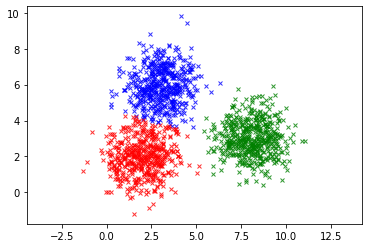

In [9]:
centroids, labels, it = kmeans(X, K)
print('Centers found by our algorithm:\n', centroids[-1])
kmeans_display(X, labels[-1])

In [10]:
# DUNG SCIKIT-LEARN

In [1]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model.cluster_centers_)
pred_label = model.predict(X)
kmeans_display(X, pred_label)

NameError: name 'X' is not defined